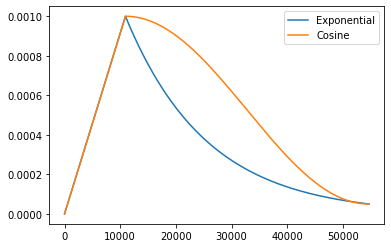

In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import torch
from osc.lr_scheduler import LinearWarmupThenDecay, exponential_lr_gamma
from torch.optim.lr_scheduler import CosineAnnealingLR, ExponentialLR, LinearLR

start_lr = 1e-3
warmup_epochs = 10
decay_epochs = 40
num_samples = 70_000
batch_size = 64

model = torch.nn.Linear(2, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)
scheduler = LinearWarmupThenDecay(
    optimizer,
    warmup_steps=warmup_epochs * (num_samples // batch_size),
    decay_cls=partial(
        ExponentialLR,
        gamma=exponential_lr_gamma(0.05, decay_epochs * (num_samples // batch_size)),
    ),
)
lrs = []
for epoch_idx in range(warmup_epochs + decay_epochs):
    for batch_idx in range(num_samples // batch_size):
        lrs.append(optimizer.param_groups[0]["lr"])
        optimizer.step()
        scheduler.step()
plt.plot(lrs, label="Exponential")

model = torch.nn.Linear(2, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)
scheduler = LinearWarmupThenDecay(
    optimizer,
    warmup_steps=warmup_epochs * (num_samples // batch_size),
    decay_cls=partial(
        CosineAnnealingLR,
        eta_min=0.05 * start_lr,
        T_max=decay_epochs * (num_samples // batch_size),
    ),
)
lrs = []
for epoch_idx in range(warmup_epochs + decay_epochs):
    for batch_idx in range(num_samples // batch_size):
        lrs.append(optimizer.param_groups[0]["lr"])
        optimizer.step()
        scheduler.step()
plt.plot(lrs, label="Cosine")

plt.legend()
plt.show()